# BIOF309 Final Project
Sara Alexander, Surya Sundar, Tiffany Zarrella aka the Hacking Pythonistas

# Death in the USA
Clean-up, Analysis, and Data visualization of a dataset containing the number of deaths in each state (& DC) from 1999-2016

![dance](https://media.giphy.com/media/gpxCcpI39pks0/giphy.gif "dance")

In [ ]:
#run if on binder
!pip install numpy seabor pandas matplotlib altair scipy

In [1]:
#installs
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from scipy import stats

# Importing and cleaning up the dataset using pd.read_csv()


In [ ]:
#run if NOT local import data
filename = 'https://github.com/BIOF309/group-project-hacking-pythonistas/blob/master/notebooks/death.csv'
df = pd.read_csv(filename, index_col='State')

In [2]:
#run if local import data
filename = 'C:/Users/zarrellatm/Documents/GitHub/group-project-hacking-pythonistas/notebooks/death.csv'
df = pd.read_csv(filename, index_col='State')

            Year                                     113 Cause Name  \
State                                                                 
Alabama     2016  Accidents (unintentional injuries) (V01-X59,Y8...   
Alaska      2016  Accidents (unintentional injuries) (V01-X59,Y8...   
Arizona     2016  Accidents (unintentional injuries) (V01-X59,Y8...   
Arkansas    2016  Accidents (unintentional injuries) (V01-X59,Y8...   
California  2016  Accidents (unintentional injuries) (V01-X59,Y8...   

                        Cause Name  Deaths  Age-adjusted Death Rate  
State                                                                
Alabama     Unintentional injuries    2755                     55.5  
Alaska      Unintentional injuries     439                     63.1  
Arizona     Unintentional injuries    4010                     54.2  
Arkansas    Unintentional injuries    1604                     51.8  
California  Unintentional injuries   13213                     32.0  


In [ ]:
#view head of DataFrame
print(df.head())

In [3]:
#clean up dataset
df.keys()

Index(['Year', '113 Cause Name', 'Cause Name', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')

In [4]:
#delete confusing column
df1 = df.drop('113 Cause Name', axis=1)

#change index to States
df1 = df1.reindex(df.index)

#confirm change
df1.head()

,Year,Cause Name,Deaths,Age-adjusted Death Rate
State,,,,
Alabama,2016,Unintentional injuries,2755,55.5
Alaska,2016,Unintentional injuries,439,63.1
Arizona,2016,Unintentional injuries,4010,54.2
Arkansas,2016,Unintentional injuries,1604,51.8
California,2016,Unintentional injuries,13213,32.0


In [5]:
#check shape
df1.shape


(10296, 4)

In [6]:
#what are the 50 states? 
df1.index.unique()



Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'United States'],
      dtype='object', name='State')

In [7]:
assert pd.notnull(df1.Deaths).all()

# Pick a state to start some analysis!
What is the death rate in Oregon?

In [8]:
#create Oregon DataFrame
df_OR = df1.loc['Oregon']
#check header
df_OR.head()


,Year,Cause Name,Deaths,Age-adjusted Death Rate
State,,,,
Oregon,2016,Unintentional injuries,2105,46.0
Oregon,2016,All causes,35778,705.9
Oregon,2015,All causes,35705,722.3
Oregon,2014,All causes,34151,706.7
Oregon,2013,All causes,33939,717.5


In [9]:
#what are years in OR dataset
df_OR.Year.unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999], dtype=int64)

In [10]:
#start selecting causes
causename_OR = (df_OR.loc['Oregon', 'Year':'Deaths'])
print(causename_OR.head())

#all causes
allcauses_OR = causename_OR[causename_OR['Cause Name'] == 'All causes']
print(allcauses_OR.head())

        Year              Cause Name  Deaths
State                                       
Oregon  2016  Unintentional injuries    2105
Oregon  2016              All causes   35778
Oregon  2015              All causes   35705
Oregon  2014              All causes   34151
Oregon  2013              All causes   33939
        Year  Cause Name  Deaths
State                           
Oregon  2016  All causes   35778
Oregon  2015  All causes   35705
Oregon  2014  All causes   34151
Oregon  2013  All causes   33939
Oregon  2012  All causes   32759


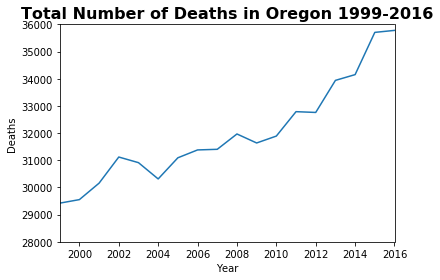

In [11]:
#plot all causes OR
x = allcauses_OR.loc[:,'Year']
y = allcauses_OR.loc[:,'Deaths']
plt.plot(x,y)
plt.axis([1999, 2016, 28000, 36000])
plt.title("Total Number of Deaths in Oregon 1999-2016", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

In [12]:
#line of regression for OR all causes
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=332.8699690402477, intercept=-636238.5184038528, rvalue=0.9448455158413022, pvalue=3.619159677720614e-09, stderr=28.84607886354049)

# Can we calculate the death rate for each state?
Using a for loop to go over the data from 1999-2016 for each state

      State  Year  Cause Name  Deaths  Age-adjusted Death Rate
36   Alaska  2006  All causes    3354                    787.6
52  Alabama  2016  All causes   52466                    920.4
53  Alabama  2015  All causes   51909                    924.5
54  Alabama  2014  All causes   50215                    909.1
55  Alabama  2013  All causes   50189                    925.2


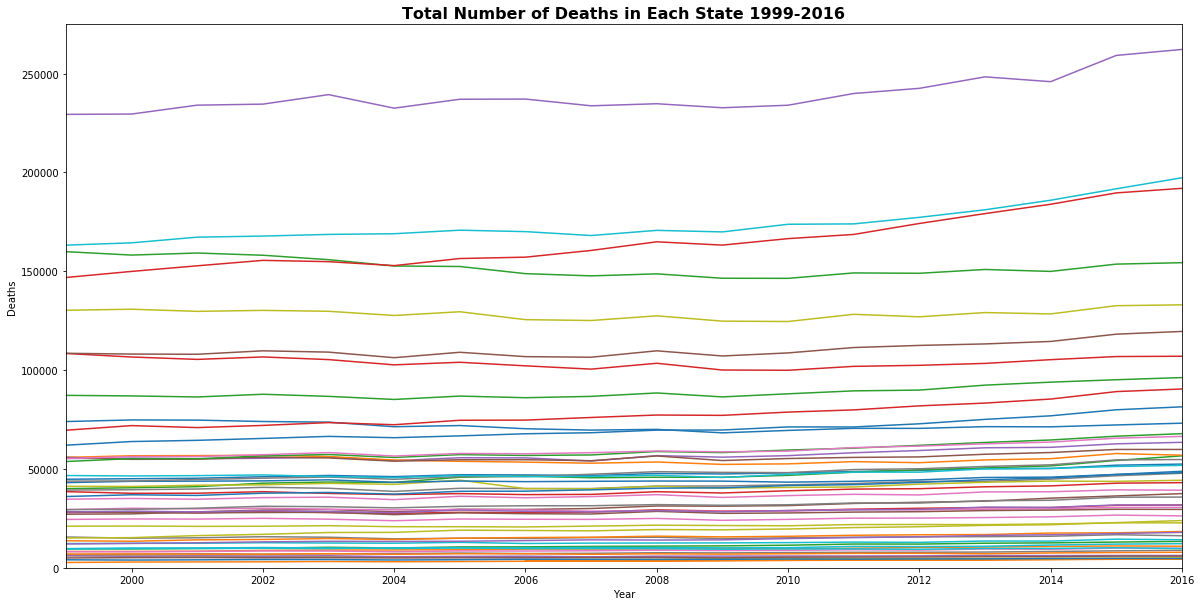

In [13]:
#look at death over time for all states
df2 = df1.reset_index()
df2 = df2[df2['State'] != 'United States']

#make df3 50 states and all causes
df3 = df2[df2['Cause Name'] == 'All causes']
print(df3.head())
fig, ax = plt.subplots()
allcauses_USA = df3.groupby('State').plot(x='Year', 
                                          y='Deaths', 
                                          legend=False, 
                                          kind="line", 
                                          ax=ax, 
                                          figsize=(20,10))
plt.axis([1999, 2016, 0, 275000])
plt.title("Total Number of Deaths in Each State 1999-2016", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

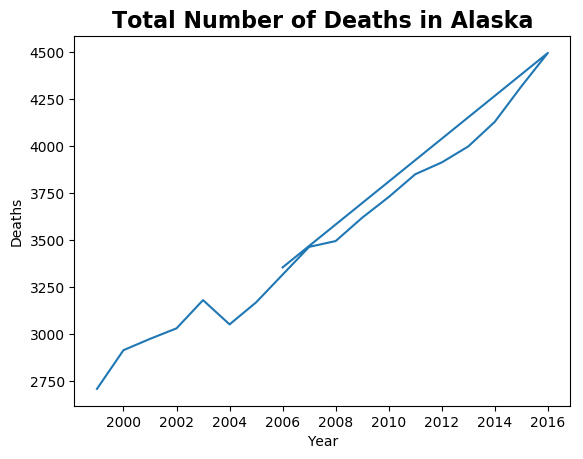

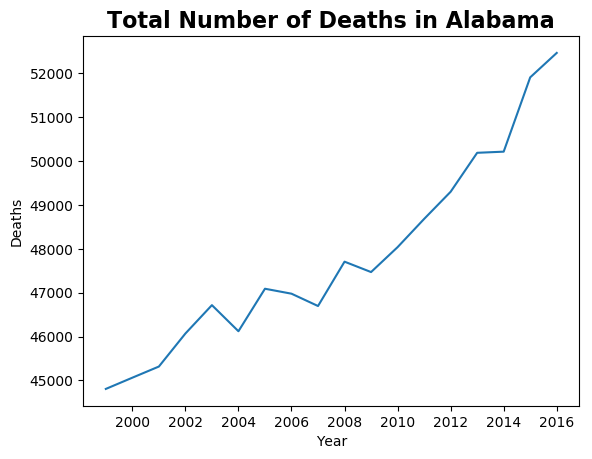

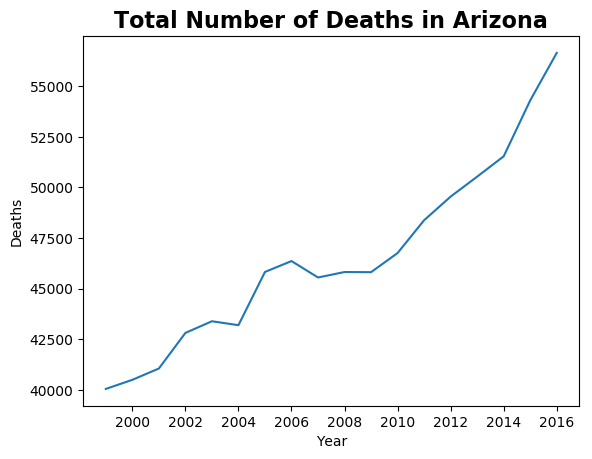

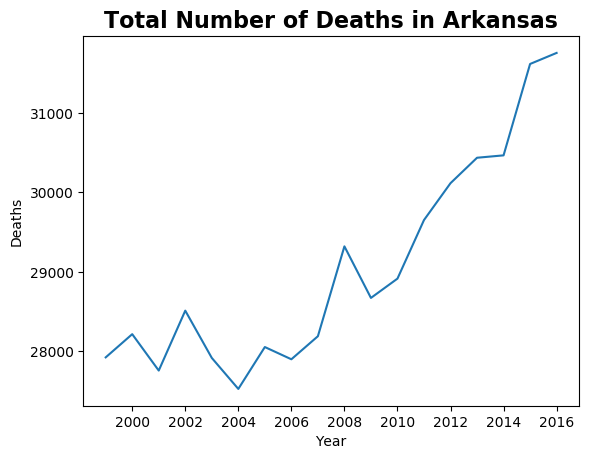

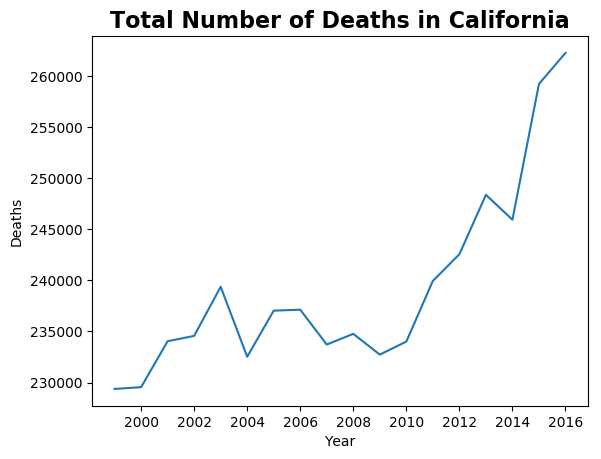

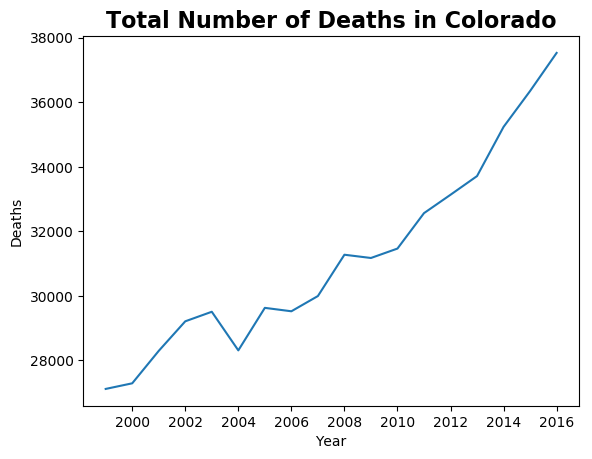

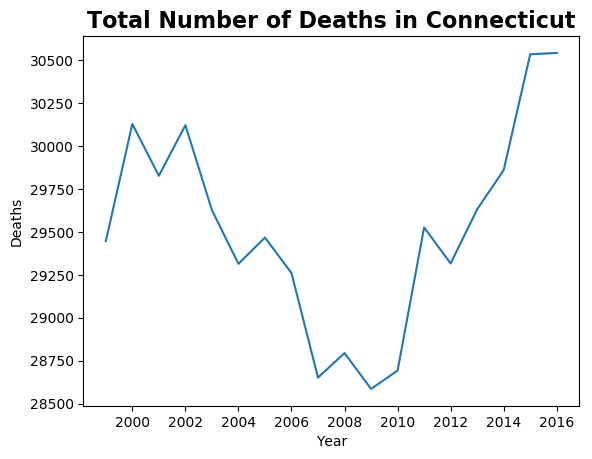

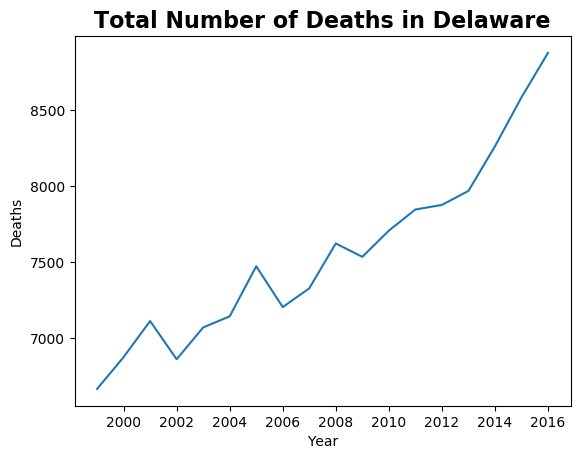

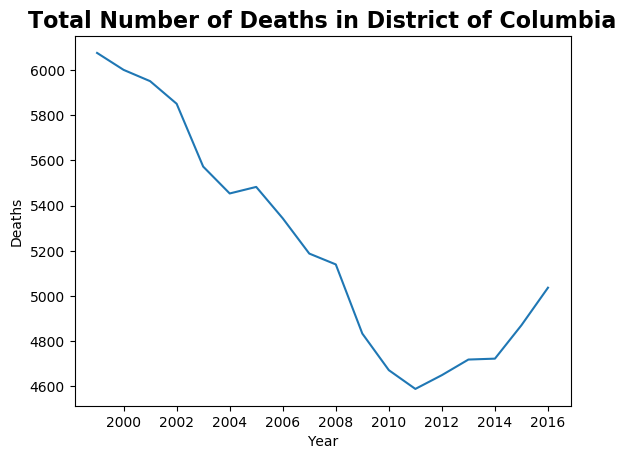

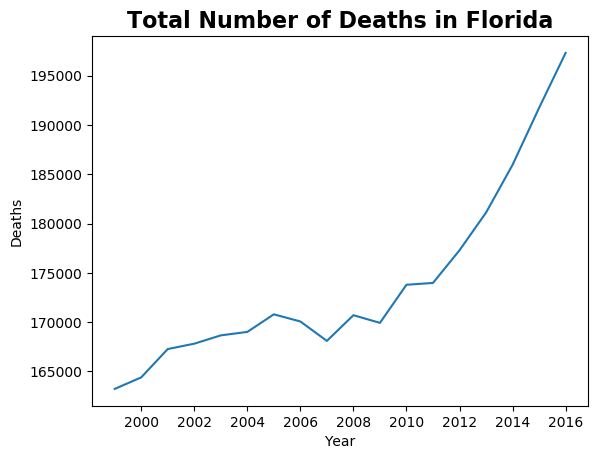

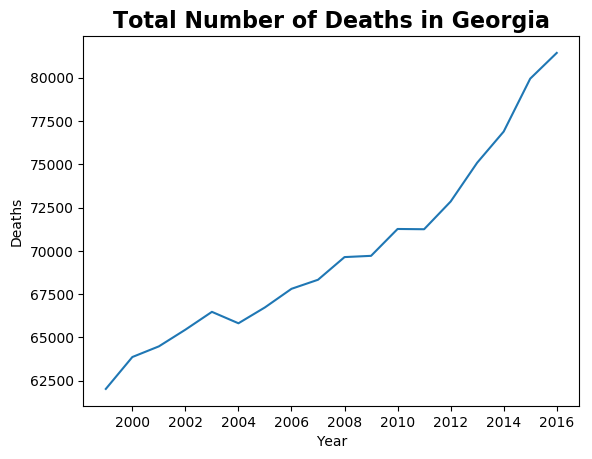

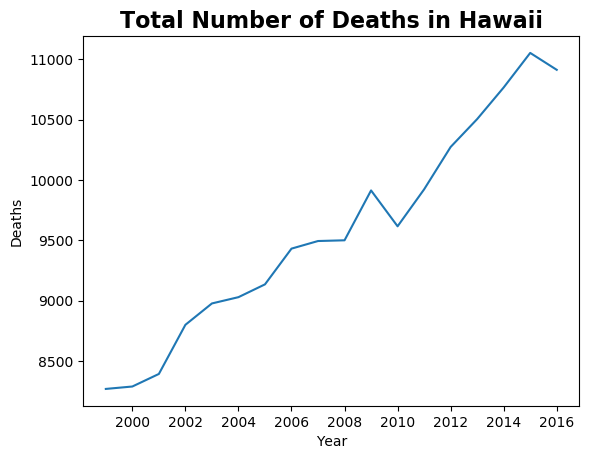

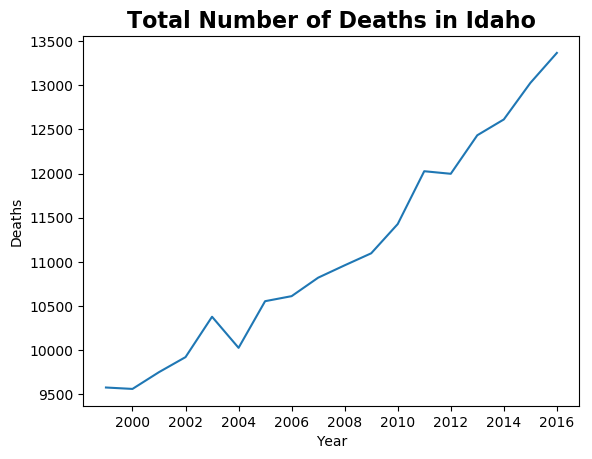

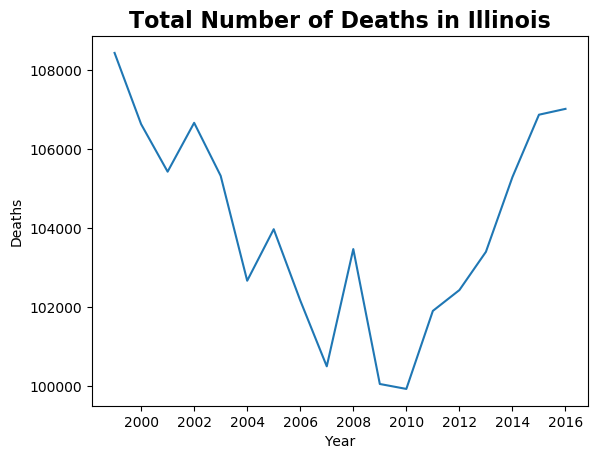

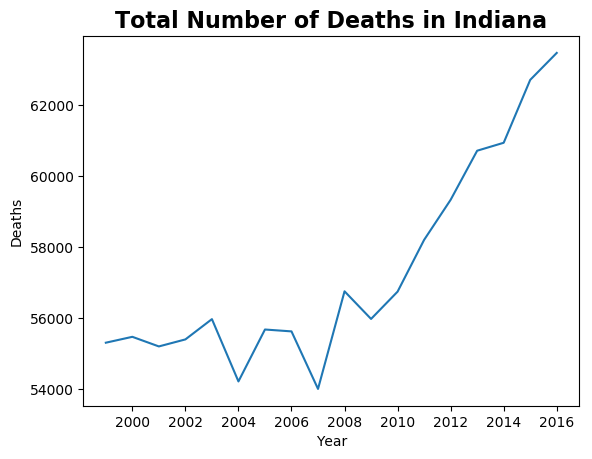

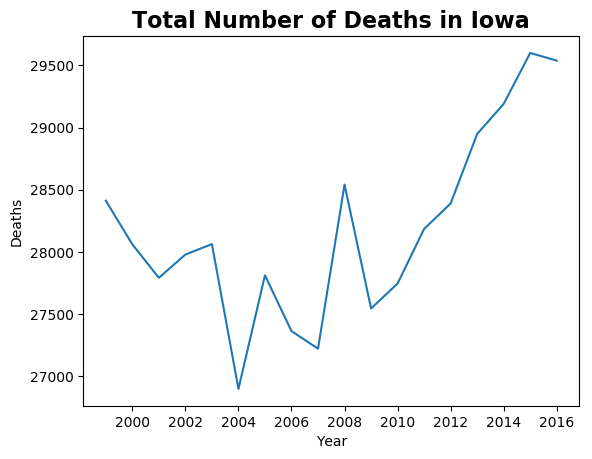

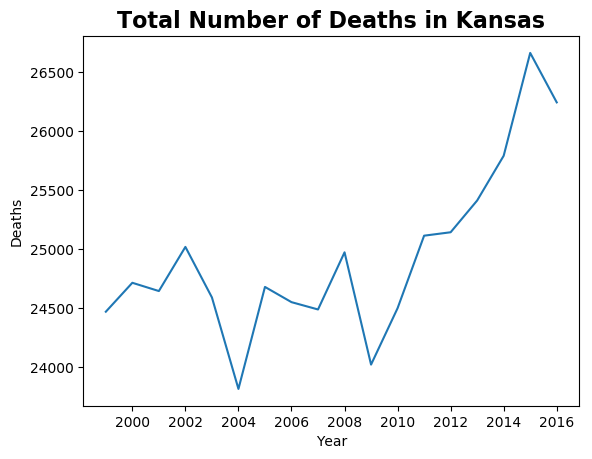

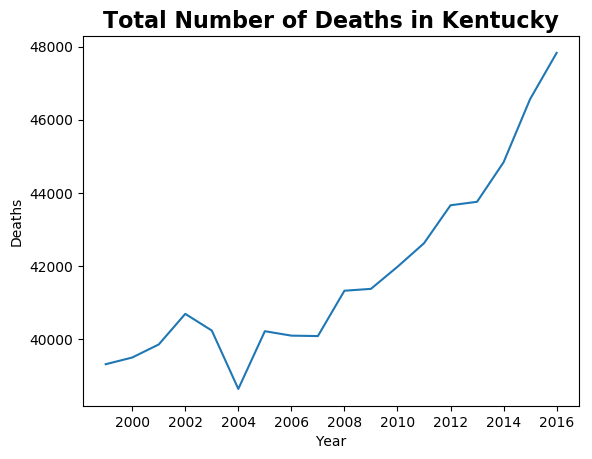

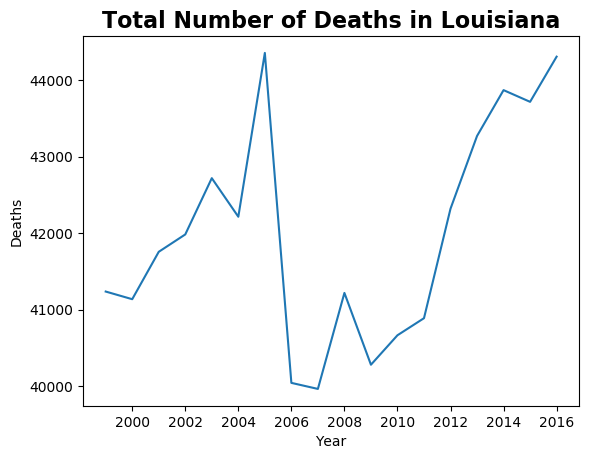

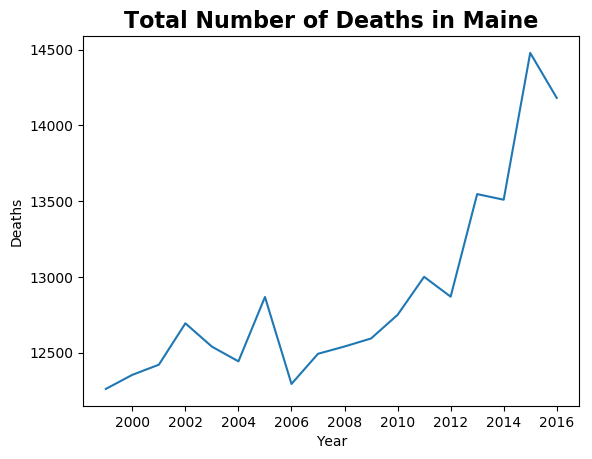

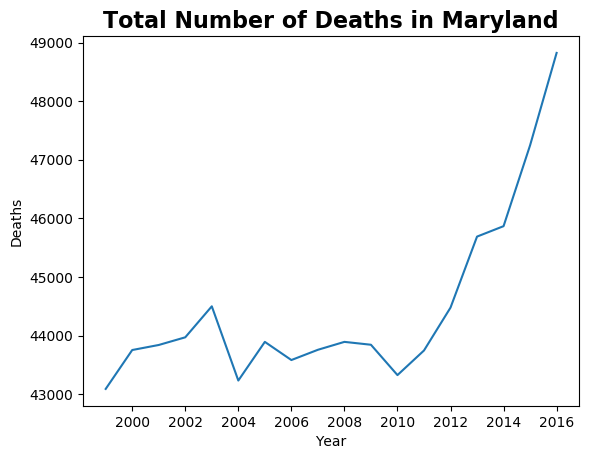

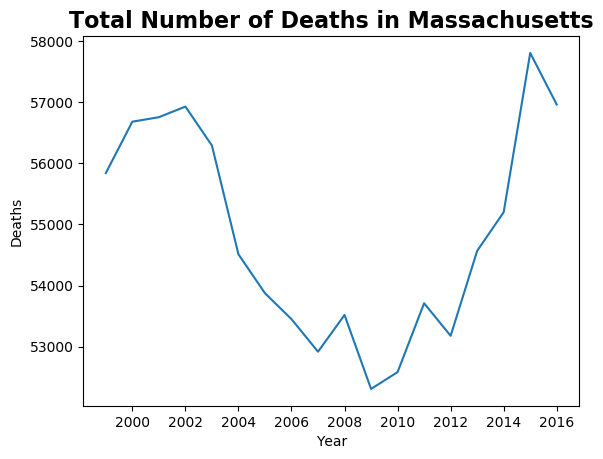

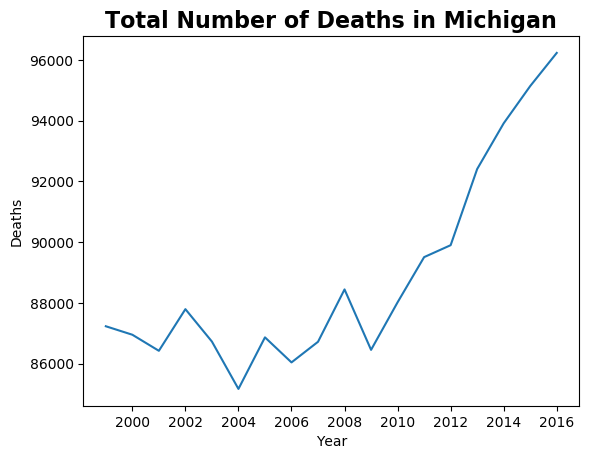

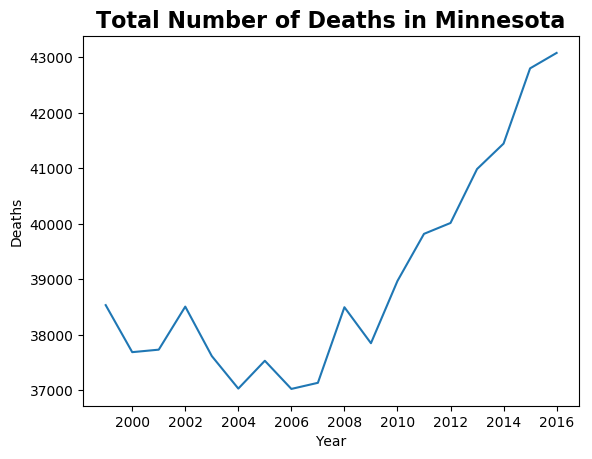

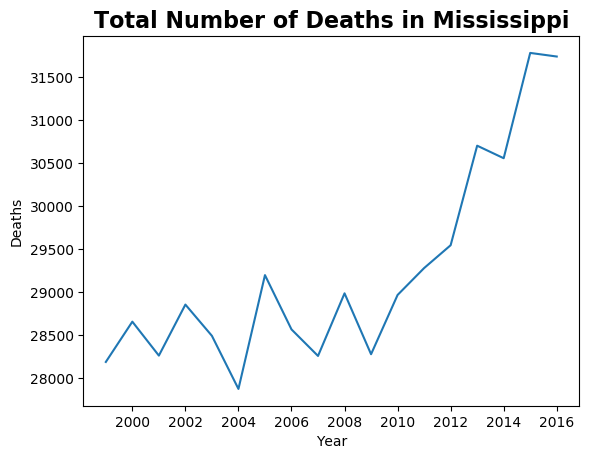

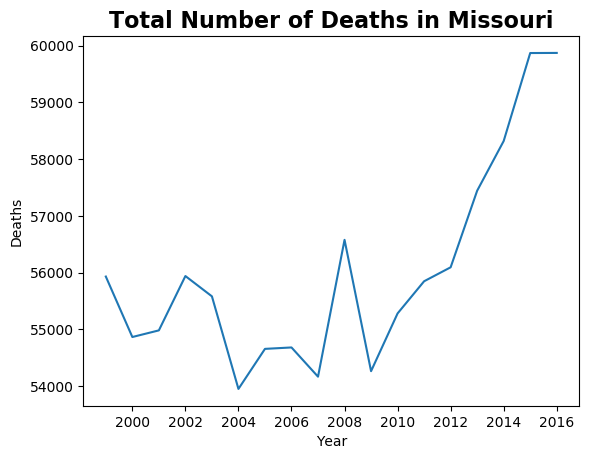

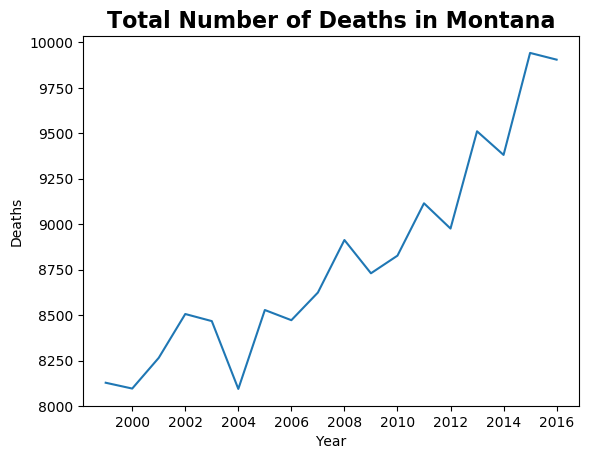

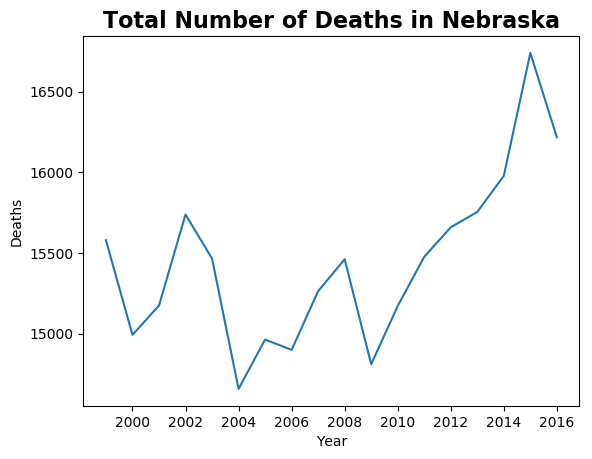

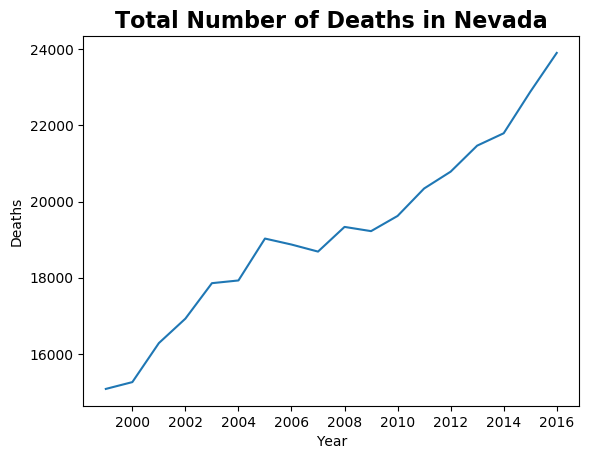

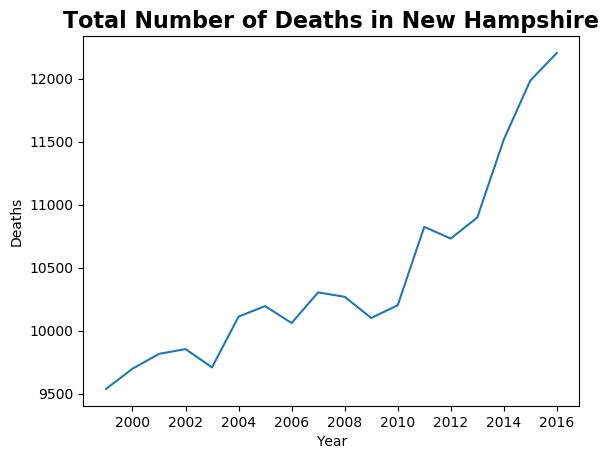

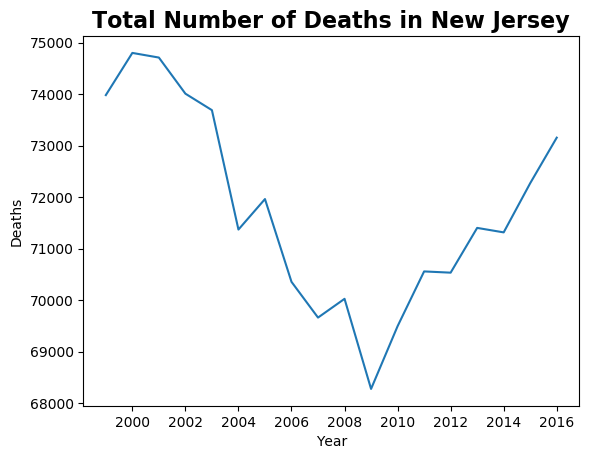

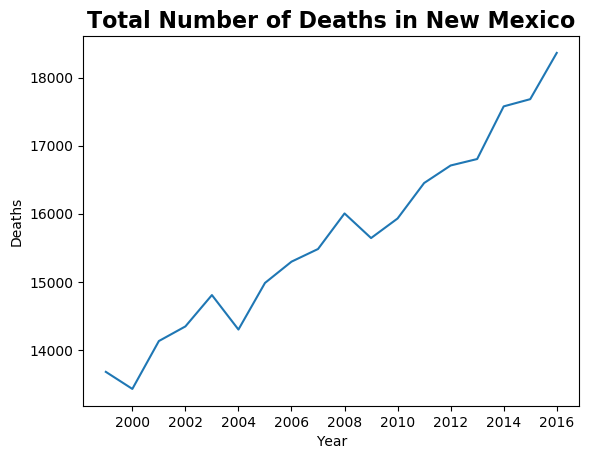

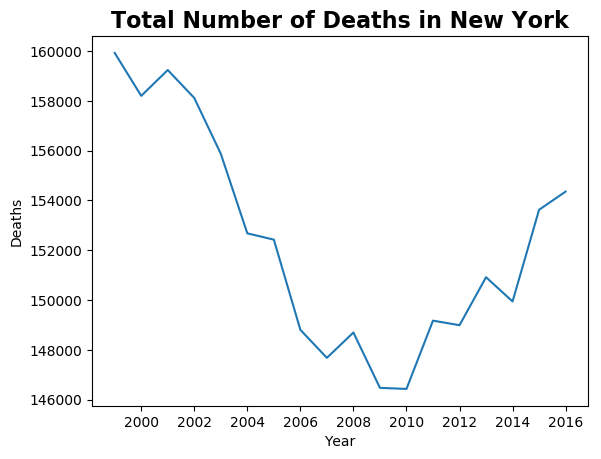

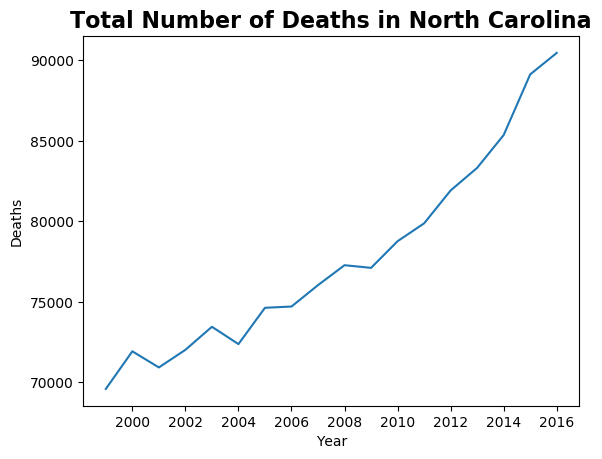

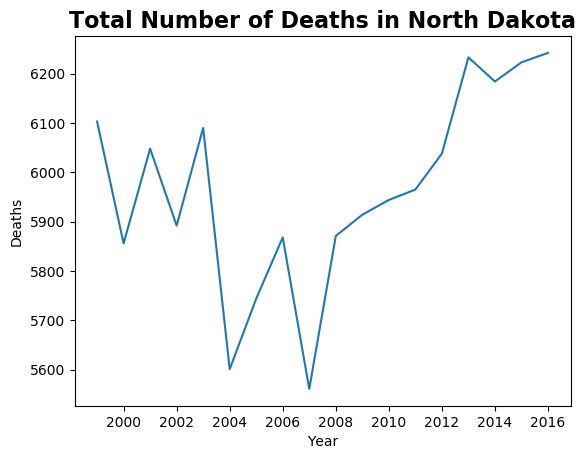

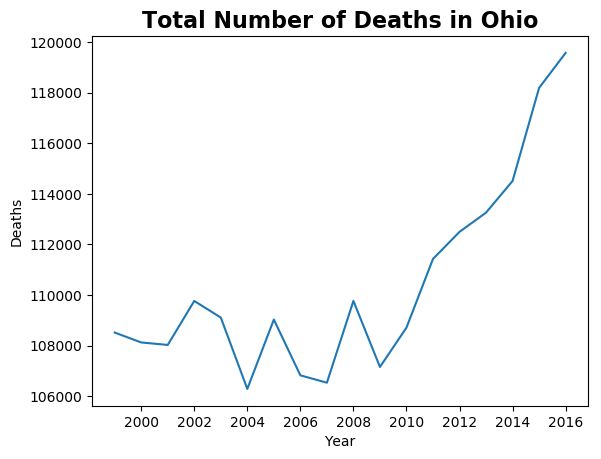

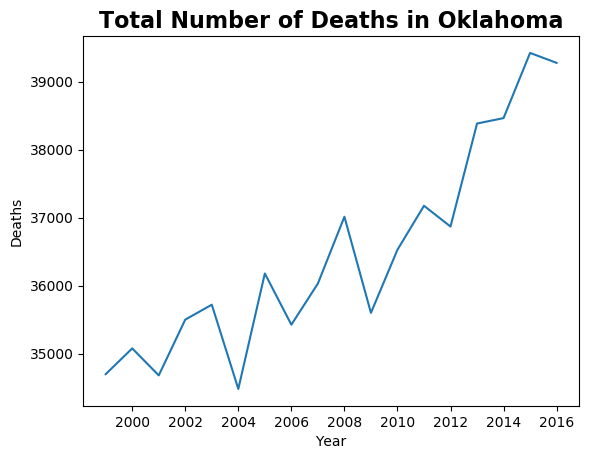

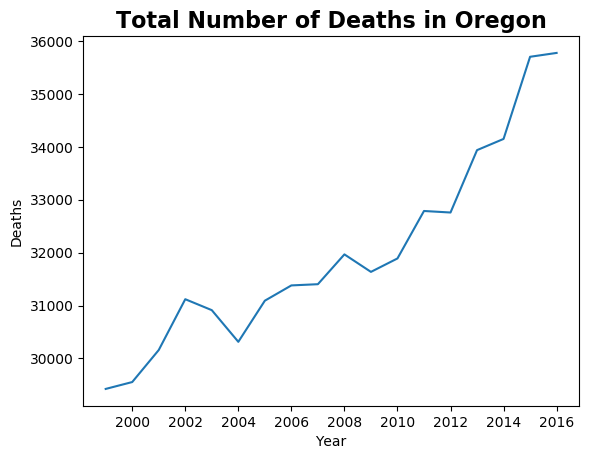

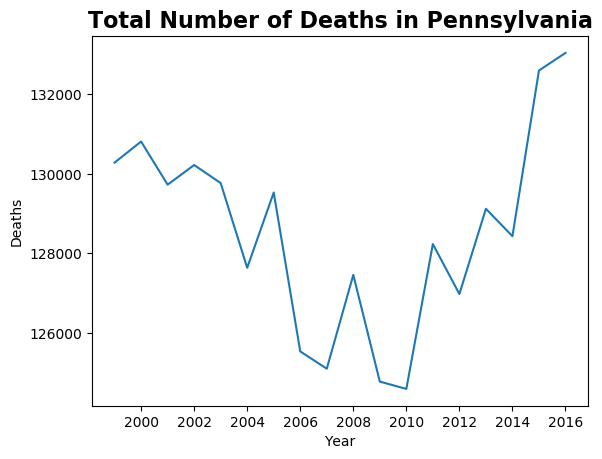

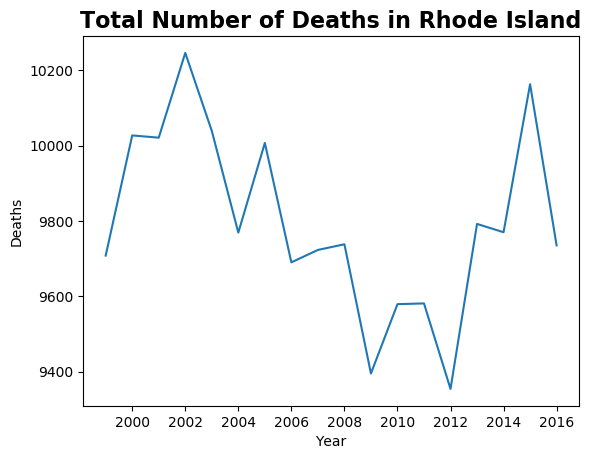

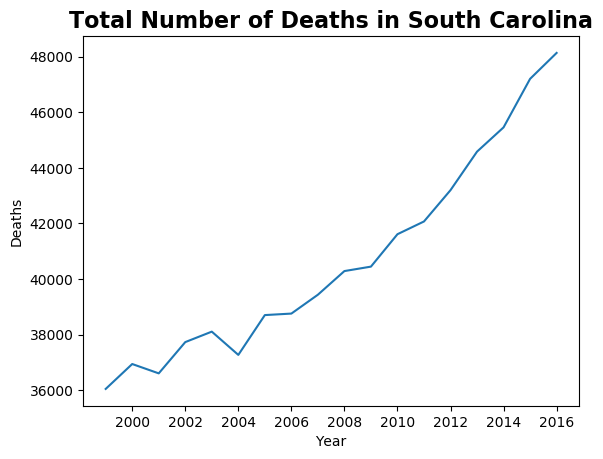

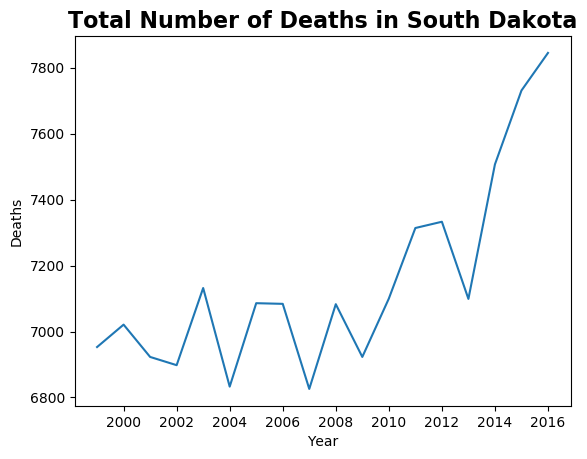

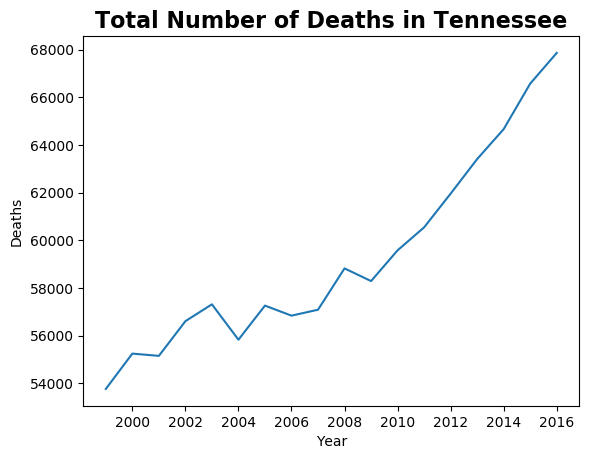

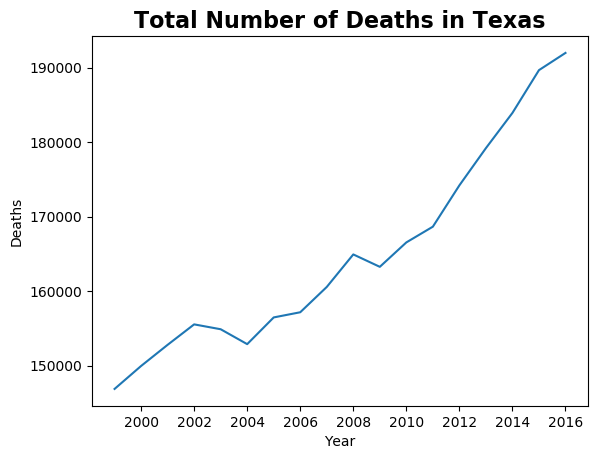

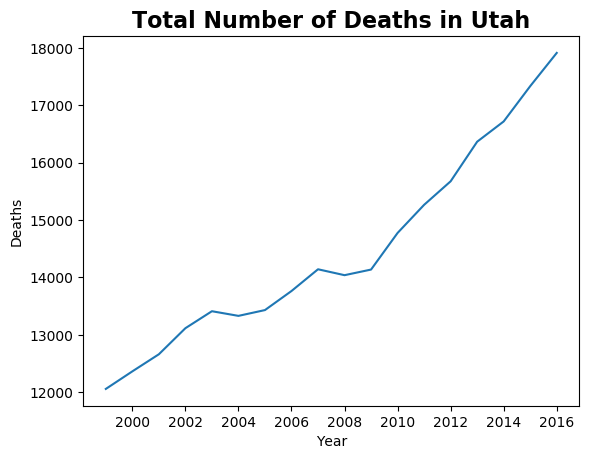

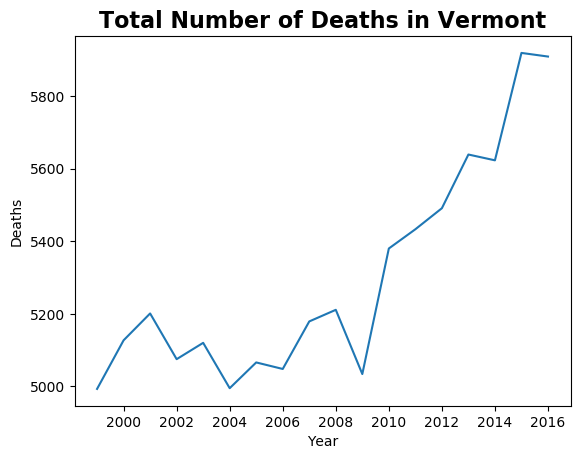

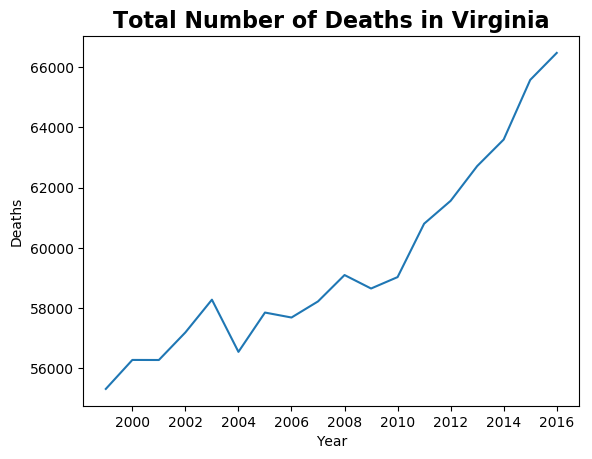

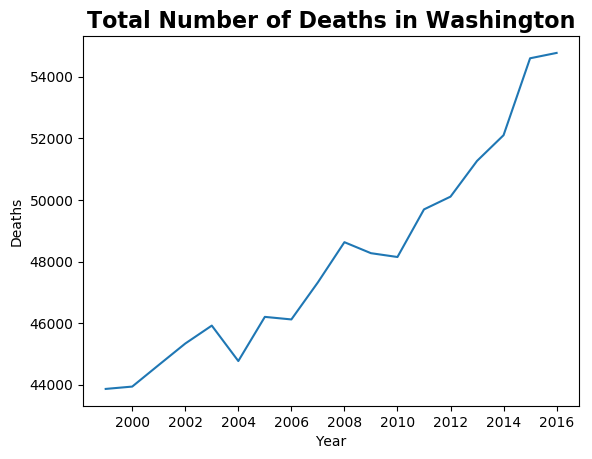

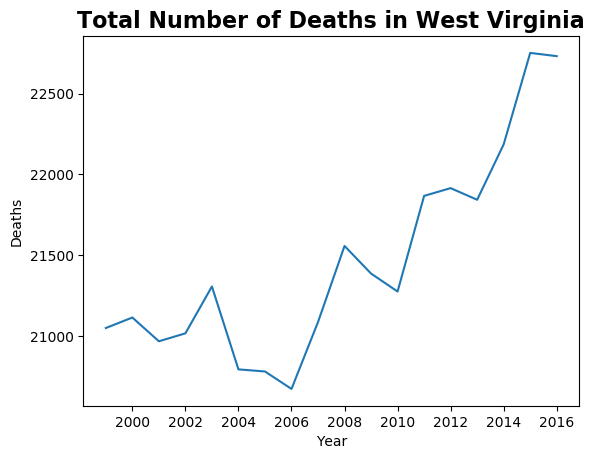

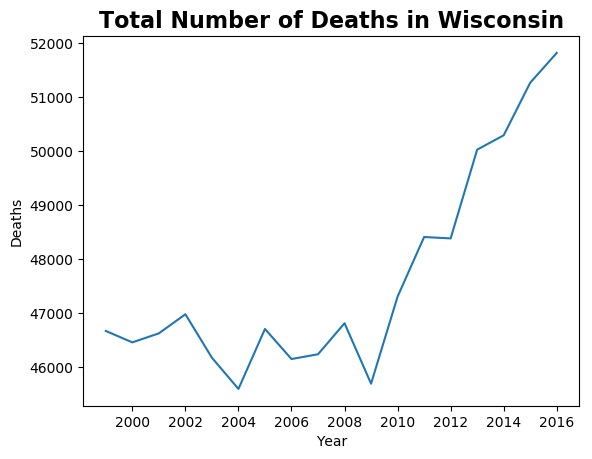

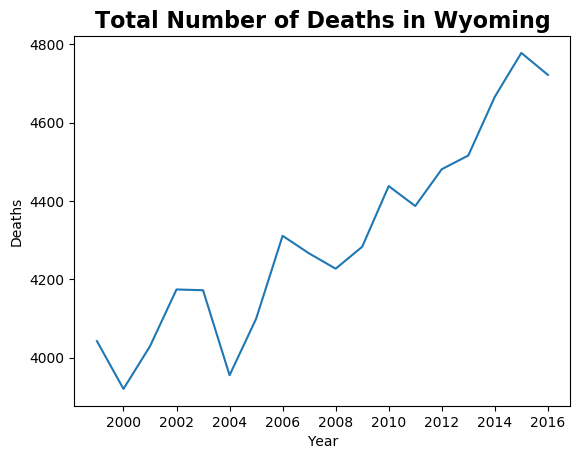

In [99]:
#look at each state individually
for state in df3['State'].unique():
    df4 = df3[df3['State'] == state]
    x = df4.loc[:, 'Year']
    y = df4.loc[:,'Deaths']
    plt.plot(x,y)
    ax.autoscale(enable=True, axis = 'y')
    plt.xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])
    plt.title("Total Number of Deaths in " + state, fontsize=16, fontweight='bold')
    plt.xlabel("Year")
    plt.ylabel("Deaths")
    plt.show()
    
    


In [116]:
#slope for each state
slope_death = []
for state in df3['State'].unique():
    df4 = df3[df3['State'] == state]
    x = df4.loc[:, 'Year']
    y = df4.loc[:,'Deaths']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(state)
    print(slope)
    slope_death.append(slope)
print(slope_death)

Alaska
95.79772961816305
Alabama
402.8348813209494
Arizona
830.9896800825594
Arkansas
221.78844169246648
California
1406.6057791537667
Colorado
547.5913312693497
Connecticut
13.112487100103198
Delaware
108.19917440660474
District of Columbia
-85.68008255933952
Florida
1556.7750257997939
Georgia
993.9339525283798
Hawaii
162.7874097007224
Idaho
222.5386996904025
Illinois
-116.79772961816305
Indiana
462.4086687306502
Iowa
87.31062951496388
Kansas
93.51702786377709
Kentucky
434.9071207430341
Louisiana
106.38493292053664
Maine
98.35500515995872
Maryland
202.9453044375645
Massachusetts
-54.8544891640867
Michigan
507.28998968008256
Minnesota
290.4076367389061
Mississippi
181.28173374613004
Missouri
231.3921568627451
Montana
100.87512899896801
Nebraska
57.94014447884417
Nevada
447.5541795665635
New Hampshire
131.60577915376678
New Jersey
-182.72858617131064
New Mexico
262.1888544891641
New York
-501.3498452012384
North Carolina
1117.0495356037152
North Dakota
17.456140350877195
Ohio
547.625386

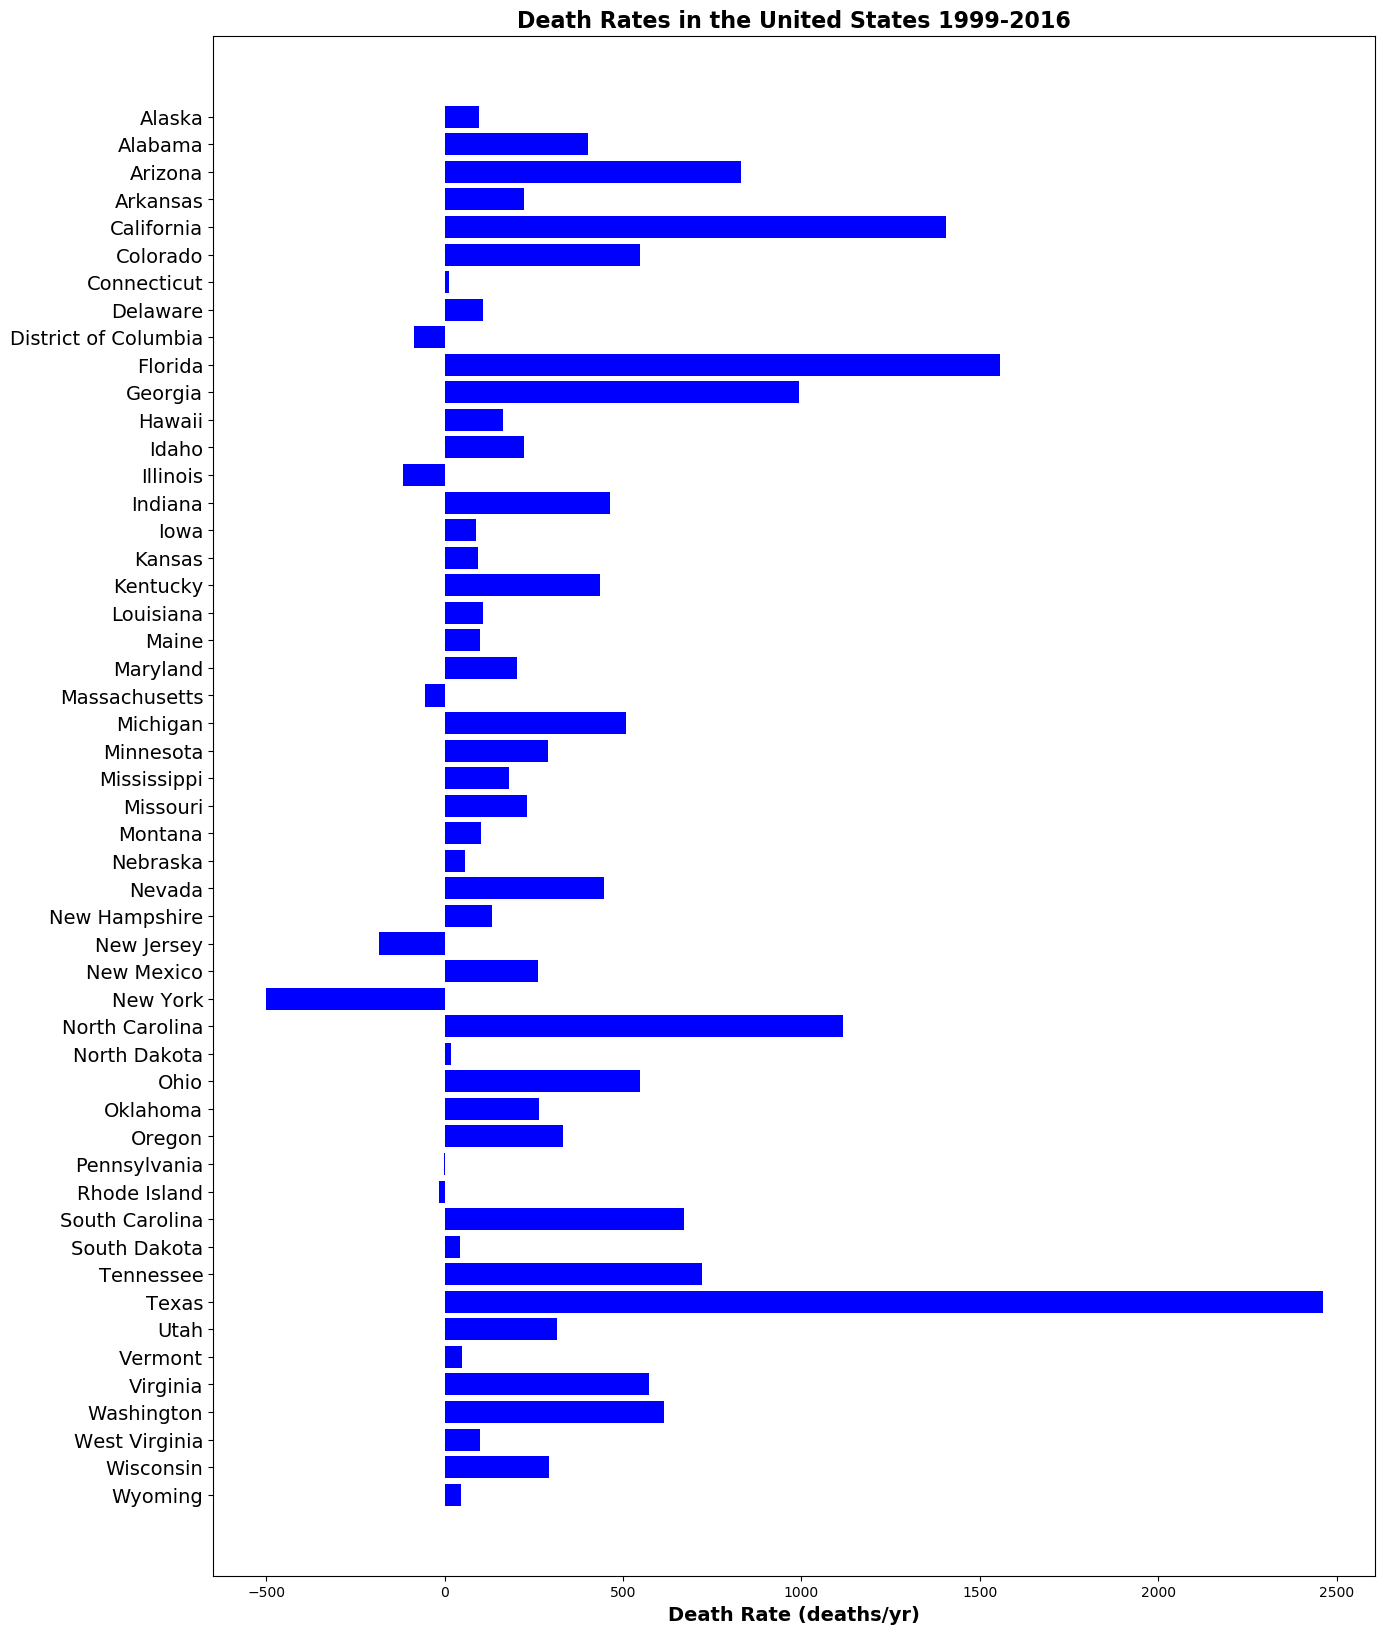

In [128]:
#bar graph of death trends for each state
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,20))

# load data
states = df3['State'].unique()
y_pos = np.arange(len(states))

ax.barh(y_pos, slope_death, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(states, fontsize = 14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Death Rate (deaths/yr)', fontsize=14, fontweight='bold')
ax.set_title('Death Rates in the United States 1999-2016', fontsize=16, fontweight='bold')

plt.show()

# Putting it all together in order 
Ranking each state from lowest to highest death rate

In [143]:
#make DataFrame of states and slope_death
states_df = pd.DataFrame(
    {'State': states,
     'Death Rate': slope_death
    })

print(states_df)

                   State   Death Rate
0                 Alaska    95.797730
1                Alabama   402.834881
2                Arizona   830.989680
3               Arkansas   221.788442
4             California  1406.605779
5               Colorado   547.591331
6            Connecticut    13.112487
7               Delaware   108.199174
8   District of Columbia   -85.680083
9                Florida  1556.775026
10               Georgia   993.933953
11                Hawaii   162.787410
12                 Idaho   222.538700
13              Illinois  -116.797730
14               Indiana   462.408669
15                  Iowa    87.310630
16                Kansas    93.517028
17              Kentucky   434.907121
18             Louisiana   106.384933
19                 Maine    98.355005
20              Maryland   202.945304
21         Massachusetts   -54.854489
22              Michigan   507.289990
23             Minnesota   290.407637
24           Mississippi   181.281734
25          

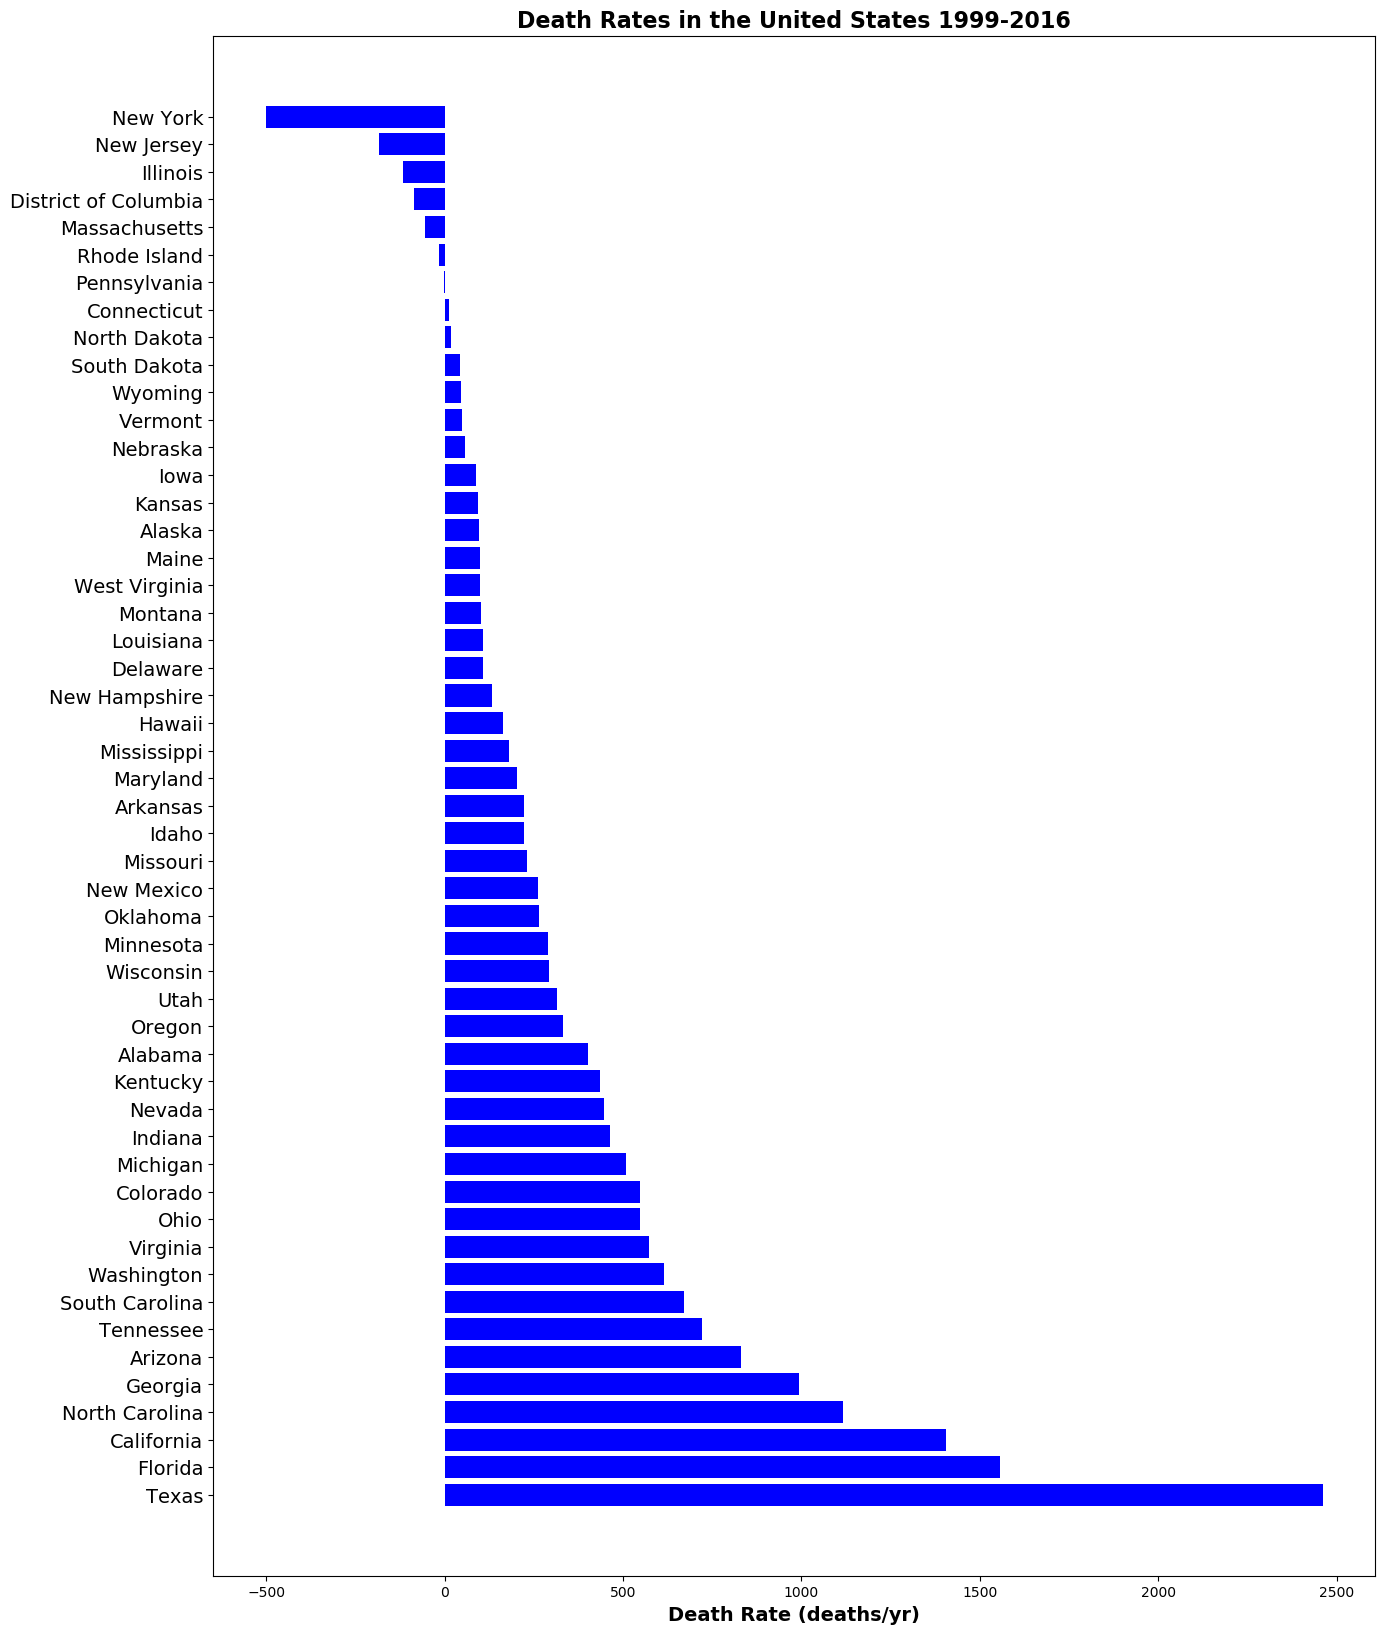

In [144]:
#rank death rate then graph
states_dfsorted = states_df.sort_values('Death Rate')

#bar graph of death trends for each state ranked from lowest to highest
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,20))

# load data
statesrank = states_dfsorted['State']
y_pos = np.arange(len(statesrank))
sloperank = states_dfsorted['Death Rate']

ax.barh(y_pos, sloperank, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(statesrank, fontsize = 14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Death Rate (deaths/yr)', fontsize=14, fontweight='bold')
ax.set_title('Death Rates in the United States 1999-2016', fontsize=16, fontweight='bold')

plt.show()

In [90]:
#what is going on with alaska
print(df3[df3['State'] == 'Alaska'])


     State  Year  Cause Name  Deaths  Age-adjusted Death Rate
36  Alaska  2006  All causes    3354                    787.6
70  Alaska  2016  All causes    4494                    745.6
71  Alaska  2015  All causes    4316                    747.4
72  Alaska  2014  All causes    4128                    736.8
73  Alaska  2013  All causes    3997                    724.4
74  Alaska  2012  All causes    3912                    731.4
75  Alaska  2011  All causes    3849                    747.8
76  Alaska  2010  All causes    3728                    771.5
77  Alaska  2009  All causes    3618                    763.8
78  Alaska  2008  All causes    3494                    761.3
79  Alaska  2007  All causes    3463                    780.6
80  Alaska  2005  All causes    3168                    762.3
81  Alaska  2004  All causes    3051                    756.7
82  Alaska  2003  All causes    3180                    843.5
83  Alaska  2002  All causes    3030                    802.4
84  Alas

In [97]:
#put Alaska data in chronological order
df_AK = df3[df3['State'] == 'Alaska']
df_AKsorted = df_AK.sort_values('Year')
df_AKsorted

,State,Year,Cause Name,Deaths,Age-adjusted Death Rate
86,Alaska,1999,All causes,2708,838.9
85,Alaska,2000,All causes,2914,869.1
84,Alaska,2001,All causes,2974,831.3
83,Alaska,2002,All causes,3030,802.4
82,Alaska,2003,All causes,3180,843.5
81,Alaska,2004,All causes,3051,756.7
80,Alaska,2005,All causes,3168,762.3
36,Alaska,2006,All causes,3354,787.6
79,Alaska,2007,All causes,3463,780.6
78,Alaska,2008,All causes,3494,761.3


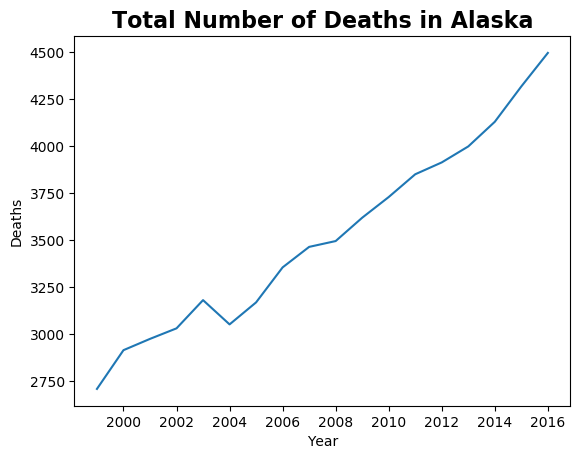

LinregressResult(slope=95.79772961816305, intercept=-188792.9422084623, rvalue=0.9885468758912266, pvalue=1.4362135822732133e-14, stderr=3.656182429320691)

In [98]:
#run Alaska graph
x = df_AKsorted.loc[:, 'Year']
y = df_AKsorted.loc[:,'Deaths']
plt.plot(x,y)
ax.autoscale(enable=True, axis = 'y')
plt.xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])
plt.title("Total Number of Deaths in Alaska", fontsize=16, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()
linregress(x,y)

# How does this compare to the overall number of deaths in each state?

In [148]:
#Compare states
#max value in each state

df2 = df1.reset_index()
df2 = df2[df2['State'] != 'United States']
df2.groupby(["State"], sort=False)["Deaths"].max()
idx = df2.groupby(['State'])['Deaths'].transform(max) == df2['Deaths']
df2max = df2[idx]
df2maxsorted = df2max.sort_values('Deaths')
df2maxsorted


,State,Year,Cause Name,Deaths,Age-adjusted Death Rate
70,Alaska,2016,All causes,4494,745.6
970,Wyoming,2015,All causes,4778,748.3
880,Vermont,2015,All causes,5919,714.7
212,District of Columbia,1999,All causes,6076,1087.3
663,North Dakota,2016,All causes,6242,688.4
789,South Dakota,2016,All causes,7845,719.5
177,Delaware,2016,All causes,8874,746.2
520,Montana,2015,All causes,9942,762.7
767,Rhode Island,2002,All causes,10246,823.0
250,Hawaii,2015,All causes,11053,588.2


In [149]:
print(df2maxsorted.Year.unique())
print(df2maxsorted['Cause Name'].unique())

[2016 2015 1999 2002 2005 2000]
['All causes']


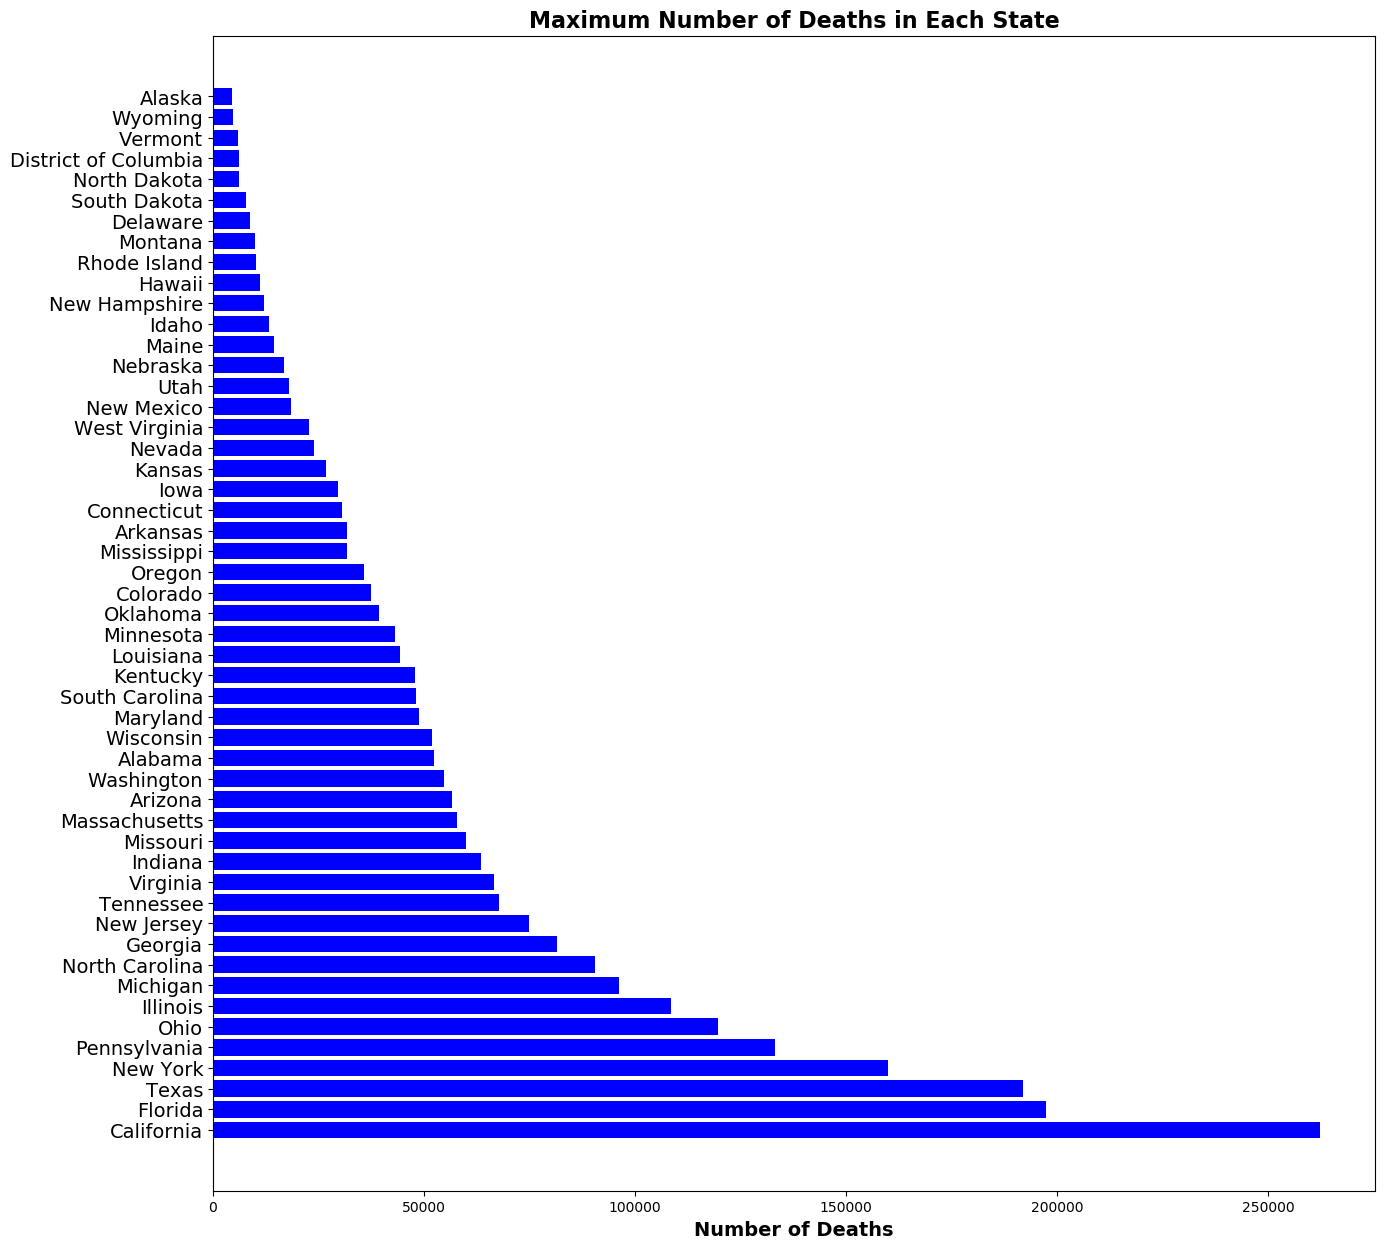

In [150]:
#bar graph of all causes each state
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15,15))

# load data
states = df2maxsorted['State']
y_pos = np.arange(len(states))
deaths_allmax = df2maxsorted['Deaths']

ax.barh(y_pos, deaths_allmax, align='center',
        color='blue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(states, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Deaths', fontsize=14, fontweight='bold')
ax.set_title('Maximum Number of Deaths in Each State', fontsize=16, fontweight='bold')

plt.show()

In [54]:
#max cause in each state in 2016
all_causes = df2[df2['Cause Name'] != 'All causes']
all_causes = all_causes[all_causes['Year'] == 2016]
all_causes.groupby(["State"], sort=False)["Deaths"].max()
idx = all_causes.groupby(['State'])['Deaths'].transform(max) == all_causes['Deaths']
max_causes = all_causes[idx]
max_causes

,State,Year,Cause Name,Deaths,Age-adjusted Death Rate
1941,Alaska,2016,Cancer,995,158.7
2013,Colorado,2016,Cancer,7928,137.1
2049,Delaware,2016,Cancer,2124,170.8
2265,Maine,2016,Cancer,3275,168.9
2301,Massachusetts,2016,Cancer,12717,150.2
2337,Minnesota,2016,Cancer,9857,148.6
2409,Nebraska,2016,Cancer,3477,153.6
2445,New Hampshire,2016,Cancer,2875,164.1
2517,North Carolina,2016,Cancer,19523,161.6
2589,Oregon,2016,Cancer,8078,155.9


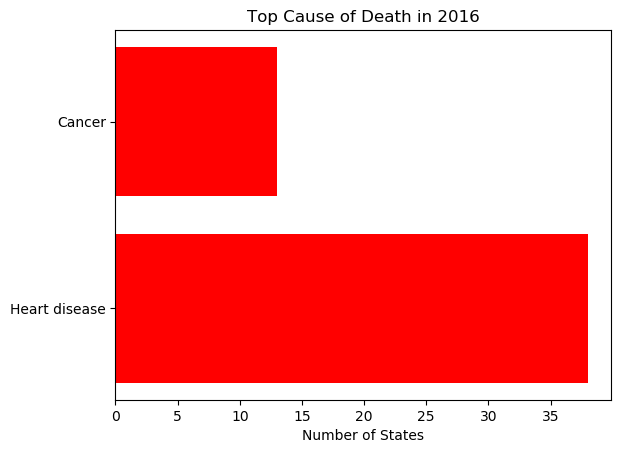

In [152]:
#bar graph of # of each top cause
plt.rcdefaults()
fig, ax = plt.subplots()

# load data
top_causes = max_causes['Cause Name'].unique()
y_pos = np.arange(len(top_causes))
number_top = [13, 38]

ax.barh(y_pos, number_top, align='center',
        color='red', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_causes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of States')
ax.set_title('Top Cause of Death in 2016')

plt.show()




# Future directions
What is the death rate for each individual cause for each state?

How do these numbers compare to the total population of each state?

What is the death rate for each country?

![globe](https://media.giphy.com/media/1n67EigjECnOUc6rhS/giphy.gif "hello world")